## IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
import cv2

## READING DATA

In [2]:
train_link='train_data'
train_label=pd.read_csv('train_labels.csv')
test_link='test_data'
test_label=pd.read_csv('test_labels.csv')

In [3]:
train_images_names=train_label.iloc[:,0].values
test_images_names=test_label.iloc[:,0].values

# This part is for checking if any null images/data are present

## PRE-PROCESSING TRAINING AND TESTING DATASET

In [4]:
x_train=[]
x_test=[]
y_train=[]
y_test=[]

In [5]:
def initialize_train_test_set(train_link,test_link,train_images_names,test_images_names,train_label,test_label):
    for i in range(len(os.listdir(train_link))):
        image=cv2.imread(train_link+'/'+str(train_images_names[i])+'.png')
        x_train.append(image)
        y_train.append(train_label.iloc[i,1])
        if i<len(test_images_names):
            image=cv2.imread(test_link+'/'+str(test_images_names[i])+'.png')
            x_test.append(image)
            y_test.append(test_label.iloc[i,1])
    return x_train,x_test,y_train,y_test

In [6]:
x_train,x_test,y_train,y_test=initialize_train_test_set(train_link,test_link,train_images_names,test_images_names,train_label,test_label)

In [7]:
x_train=np.array(x_train,dtype='float32')
x_test=np.array(x_test,dtype='float32')
y_train=np.array(y_train)
y_test=np.array(y_test)

In [8]:
x_train.shape

(8000, 32, 32, 3)

In [9]:
x_train/=255
x_test/=255

## I FORAMTTED THE 'CAT'/'DOG' TO 0,1 NUMERIC FORMAT

In [10]:
class_labels={0: 'cat', 1: 'dog'}   

In [11]:
for i in range(len(y_train)):
    if y_train[i]=='cat':
        y_train[i]=0
    else:
        y_train[i]=1

In [12]:
for i in range(len(y_test)):
    if y_test[i]=='cat':
        y_test[i]=0
    else:
        y_test[i]=1

## NOW JUST CATEGORICALLY ENCODED THE Y-DATASET FOR BETTER FITTING WITH THE CNN MODEL

In [13]:
y_train=tf.keras.utils.to_categorical(y_train,2)
y_test=tf.keras.utils.to_categorical(y_test,2)

## IMPORTED THE REQUIRED LAYERS AND MODELS FROM KERAS

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPool2D,Conv2D,Flatten

## THE MODEL CREATION AND FITTING TO THE TRAINING SET

In [15]:
seq=Sequential()
# Convulational Layers(image preprocessing layer)
seq.add(Conv2D(filters=50,kernel_size=(3,3),strides=1,padding='same',activation='relu')) #need to add an input shape argument
seq.add(Conv2D(filters=75,kernel_size=(3,3),strides=1,padding='same',activation='relu')) #if we didn't change the shape before
seq.add(MaxPool2D(pool_size=2))
seq.add(Dropout(rate=0.25)) #randomly sets some values in the array to 0 but makes the same unchanging but scaling the remaining
#with 1/(1-rate) "ps:rate is the frequency by which the values become 0"
seq.add(Conv2D(filters=125,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
seq.add(MaxPool2D(pool_size=2))
seq.add(Dropout(rate=0.25))
seq.add(Flatten())
# Hidden layers (neurons)
seq.add(Dense(units=500,activation='relu'))
seq.add(Dropout(rate=0.4))
seq.add(Dense(units=250,activation='relu'))
seq.add(Dropout(rate=0.3))
# Outpout layer
seq.add(Dense(units=2,activation='softmax'))
# Compiling
seq.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Training model
seq.fit(x_train,y_train,batch_size=256,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
32/32 [==============================] - 26s 792ms/step - loss: 0.7094 - accuracy: 0.5220 - val_loss: 0.6860 - val_accuracy: 0.5235
Epoch 2/10
32/32 [==============================] - 25s 794ms/step - loss: 0.6833 - accuracy: 0.5621 - val_loss: 0.6829 - val_accuracy: 0.5805
Epoch 3/10
32/32 [==============================] - 25s 796ms/step - loss: 0.6627 - accuracy: 0.5970 - val_loss: 0.6549 - val_accuracy: 0.6250
Epoch 4/10
32/32 [==============================] - 26s 806ms/step - loss: 0.6322 - accuracy: 0.6489 - val_loss: 0.6073 - val_accuracy: 0.6780
Epoch 5/10
32/32 [==============================] - 26s 800ms/step - loss: 0.5918 - accuracy: 0.6829 - val_loss: 0.5830 - val_accuracy: 0.6885
Epoch 6/10
32/32 [==============================] - 25s 793ms/step - loss: 0.5646 - accuracy: 0.7055 - val_loss: 0.5670 - val_accuracy: 0.7175
Epoch 7/10
32/32 [==============================] - 25s 797ms/step - loss: 0.5324 - accuracy: 0.7315 - val_loss: 0.5410 - val_accuracy: 0.7295

## CHECKING THE ACCURACY OF MODEL

In [16]:
batch_score=x_test[:]
labels_score=np.argmax(y_test[:],axis=-1)

In [17]:
predictions_score=seq.predict(batch_score,verbose=1) #verbose is meant to show the progress bar of the predictions

63/63 [==============================] - 2s 28ms/step


In [18]:
class_result_score=np.argmax(predictions_score,axis=-1)

## ACCURACY CAN INCREASE TO 77.3 IF EPOCHS ARE SET TO 20

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_score,class_result_score))

0.753


## CHECKING ACCURACY FOR 10 IMAGES

In [20]:
batch=x_test[0:9]
labels=np.argmax(y_test[0:9],axis=-1)

In [21]:
predictions=seq.predict(batch,verbose=1)

1/1 [==============================] - 0s 31ms/step


In [22]:
for image in predictions: # Adding the predicted values of a image being any of the particular outputs
    print(np.sum(image))  # the total probability must be close to 1.If it isn't there might be overfitting or model is not good

1.0
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0


In [23]:
class_result=np.argmax(predictions,axis=-1)
print(class_result)

[0 0 0 0 0 0 0 1 0]


## PRINTING THE IMAGES AND CHECKING MODEL PREDICTION

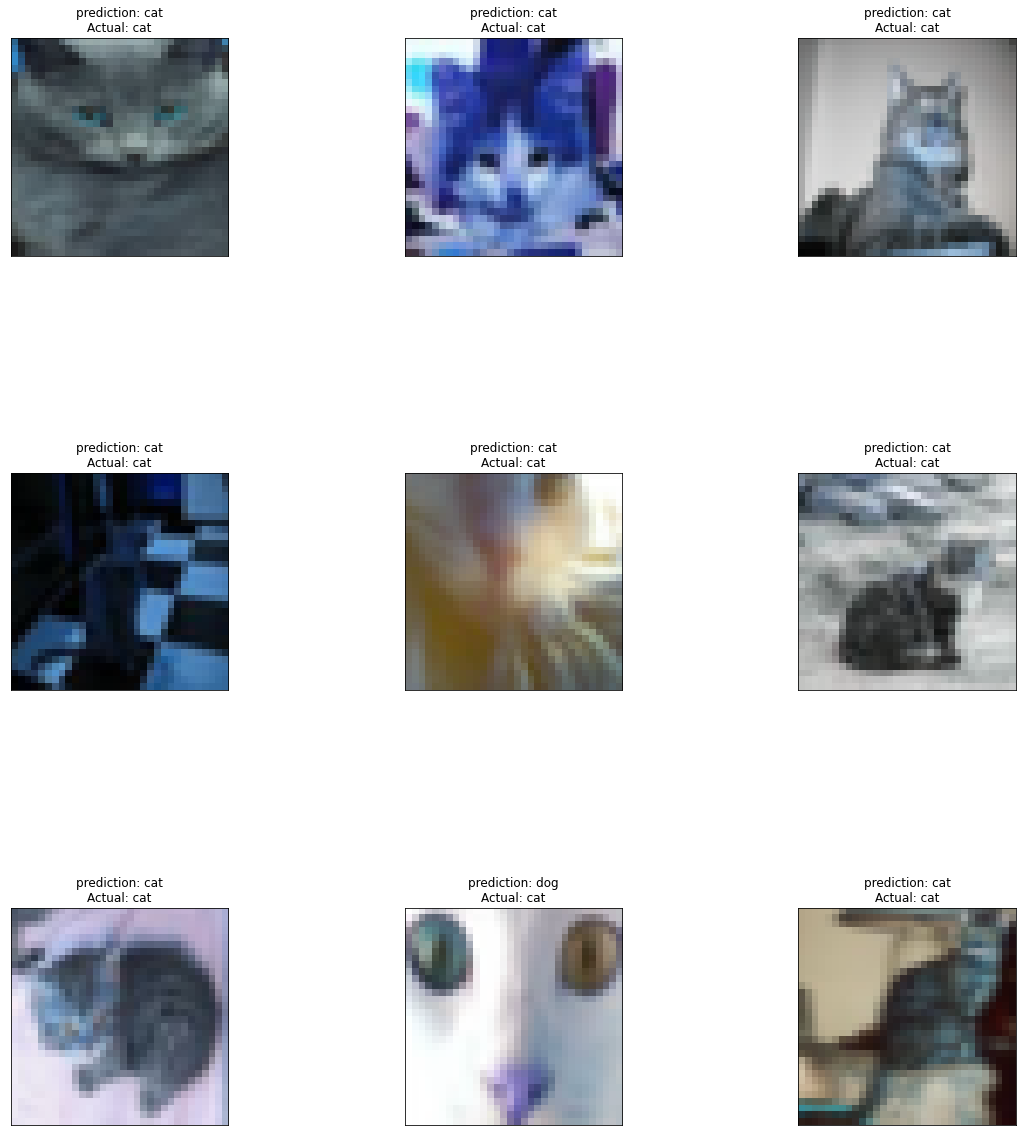

In [24]:
fig,axs=plt.subplots(nrows=3,ncols=3,figsize=(20,20))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i]==key:
            title='prediction: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    axs[i].imshow(img)
plt.show()